In [1]:
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(f'{os.getcwd()}','data/video', f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)  

## Read Video from File

In [21]:
source = '/Users/gouher/Documents/personal/codes/computer_vision/image_processing_concepts/data/video/race_car.mp4'
cap = cv2.VideoCapture(source)
cap

< cv2.VideoCapture 0x155a4b6b0>

In [10]:
if not cap.isOpened():
    print("Error opening video stream or file")

## Video Properties

_Frame Width_

In [22]:
frame_width = int(cap.get(3))
cap.get(3),cap.get(cv2.CAP_PROP_FRAME_WIDTH)

(1728.0, 1728.0)

_Frame Height_

In [23]:
frame_height = int(cap.get(4))
cap.get(4),cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

(1080.0, 1080.0)

_Frames Per Second (FPS)_

In [56]:
cap.get(5),cap.get(cv2.CAP_PROP_FPS)

(30.0, 30.0)

_Frame Count_

In [63]:
cap.get(7),cap.get(cv2.CAP_PROP_FRAME_COUNT)

(210.0, 210.0)

## Read One Frame

_Each frame is a numpy array having 3 channels_

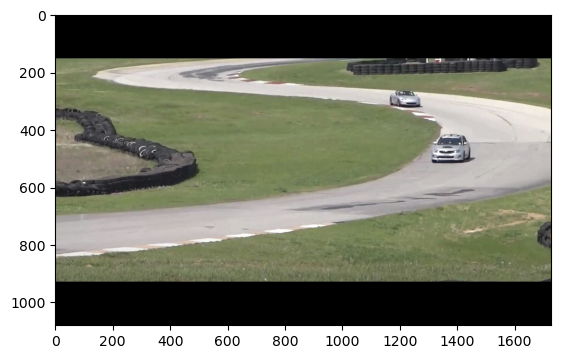

In [97]:
ret, frame = cap.read()
plt.imshow(frame[:,:,::-1])

In [12]:
frame[::-1].shape

(1080, 1728, 3)

In [8]:
frame.shape

(1080, 1728, 3)

## Play the Video

In [42]:
from IPython.display import HTML
html_str = f"""
<video width=512 controls>
    <source src="{source}" type="video/mp4">
</video>
"""
html = HTML(html_str)
html

## Write Video in a given Format

_.avi format_

In [19]:
# Should be int
frame_width,frame_height

(1728, 1080)

In [ ]:
path = '/Users/gouher/Documents/personal/codes/computer_vision/image_processing_concepts/data/video/race_car.avi'
avi_writer = cv2.VideoWriter(filename=path,fourcc=cv2.VideoWriter_fourcc('M','J','P','G'),fps=10,frameSize=(frame_width,frame_height))
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        avi_writer.write(frame)
    else:
        break

< cv2.VideoWriter 0x166128db0>

In [20]:
path = '/Users/gouher/Documents/personal/codes/computer_vision/image_processing_concepts/data/video/race_car_o1.mp4'
writer = cv2.VideoWriter(filename=path,fourcc=cv2.VideoWriter_fourcc('M','P','4','V'),fps=10,frameSize=(frame_width,frame_height))
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        writer.write(frame)
    else:
        break

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
